# 数学基礎

本講義は、深層学習(主にニューラルネットワーク)について解説します。ここでは、ニューラルネットワークの理解に必要な数学の基本知識をおさらいします。

## 微分

### 微分の概念

微分とは、結論から言うと、変数の微小な変化に対応する、関数の変化量を求めることです。

微分を用いると接線の傾きを計算することができます。このことから、微分が関数の最小化問題に有用なツールであることがわかります。

- $x$から$ℎ$だけ離れた点$𝑥+ℎ$を考え, 2点を通る直線の傾きを求めることができます。

$$
a= \frac{f(x + h) - f(x)}{(x+h)-x}
$$

- 次に$h$を$h \rightarrow 0$のように小さくしていけば、直線の開始点と終了点の2点が1点に収束し、1点での接線として考えることができます。このように、平均変化率の極限値が存在するならば、微分可能であると言います。この式を$f$の導関数 (derivative)と呼び、$f'(x)$と書きます。関数$f(x)$の微分係数$f'(a)$はその曲線の点$(a,f(a))$(接点)における接線の傾きです。

$$
f'(x)= \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}
$$
![](./Figure/derivative.png)

- 導関数を求めることを微分(differentiation)するといいます。 記号の使い方として、$f'(x)$を$\frac{df}{dx} (x)$ または $ \frac{d}{dx}f (x)$と書きます。

```{margin}

関数 $f(x)$ について、変数 $x$をある値 $a$ に限りなく近づけるとき、どのような近づけ方に対しても関数 $f(x)$　の値が一定値$A$に限りなく近づくならば、$x$が$a$に近づくとき$f(x)$は値$A$に収束といい、$A$を極限値と言います。

```

### Pythonによる微分計算

Pythonで微分を計算するためには、```SymPy```というライブラリを使用するのが一般的です。

In [1]:
from sympy import symbols, diff

# シンボリック変数の定義
x = symbols('x')

# 関数の定義
function_1 = x**3 - 3*x**2 + x

# 関数の微分
function_1_prime = diff(function_1, x)

function_1_prime

3*x**2 - 6*x + 1

In [2]:
# x=4を代入して値を計算
value_at_x4 = function_1_prime.subs(x, 4)

print(value_at_x4)

25


In [3]:
# 微分の近似計算の精度と計算の安定性のバランスをとるために、中心差分法といった関数の前後の点を使用して計算する方法を用いる
def numerical_diff(f,x):
    h = 1e-4 # 微小な変化量: 0.0001
    nd = (f(x+h) - f(x-h))/(2 * h)
    return nd

In [4]:
def function_1(x):
    return x**3 - 3*x**2 + x

In [5]:
print(numerical_diff(function_1, 4)) # 25.0 に近い値が期待される

25.000000010031442


### 微分の公式

覚えておくと便利な微分の公式がありますので，以下に幾つか紹介していきます。

$$
\begin{split}\begin{align}
\left( c\right) ^{'}&=0 \\
\left( x\right)^{'}&=1\\
\left( cf(x) \right)^{'} &= c f'(x) \\
\left( x^{n} \right)^{'} &=nx^{n-1} \\
\left( f(x) + g(x) \right) ^{'} &=f^{'}(x)+g^{'}(x) \\
\left( f(x) g(x) \right) ^{'} &= f^{'}(x)g(x) + f(x)g^{'}(x) \\
\left( f(g(x)) \right) ^{'} &= \frac{df(u)}{du}\frac{du}{dx} = f^{'}(g(x)) \cdot g^{'}(x) \\
\end{align}\end{split}

$$

### 合成関数の微分

$𝑦=𝑓(𝑥)$と $𝑧=𝑔(𝑦)$の合成関数とは、$𝑓$を適用したあとに$𝑔$を適用する関数、すなわち $𝑧=𝑔(𝑓(𝑥))$のことを指します。

**<u>合成関数の導関数がそれぞれの導関数の積で与えられる性質は連鎖律（chain rule）と言います。**</u>

$$
\frac{d}{dx} f(g(x)) = \frac{df(u)}{du}\frac{du}{dx}
$$

```{note}

関数
$y = \sin(3x^2 + 4x)$
の微分を求めます。

ここで、

$$f(u) = \sin(u)$$

$$g(x) = 3x^2 + 4x$$
とし、$y$ は $f$ と $g$ の合成関数、すなわち $y = f(g(x))$ であると考えます。

連鎖律を用いると:

$$
\frac{dy}{dx} = \frac{df}{du} \cdot \frac{du}{dx}
$$

1. $f'(u) = \cos(u)$
2. $g'(x) = 6x + 4$

これらを連鎖律の式に代入すると:

$$
\frac{dy}{dx} = \cos(3x^2 + 4x) \cdot (6x + 4)
$$

したがって、

$$
y' =  \cos(3x^2 + 4x) \cdot (6x + 4)
$$

が得られます。

このように、連鎖律を使用することで、合成関数の微分を計算することができます。

```

### 偏微分

機械学習において、多くの場合、複数の入力変数 $𝑥_1,𝑥_2,…,𝑥_n$を用いて$𝑦$を予測する多変数関数が扱われます。

**<u>偏微分**</u>とは、$n$変数関数のある一つの変数以外の$n-1$個の変数の値を固定し、残りの$1$つの変数について関数を微分することです。

例えば、ある入力 $𝑥_n$にのみ注目する偏微分は以下のように表します。

$$
\frac{\partial}{\partial x_{n}} f(x_1, x_2, \dots, x_n)
$$

微分を意味する記号が、$𝑑$から$\partial$に変わっています。こうすると、$\frac{\partial}{\partial x_{n}}$は $x_n$以外を定数と考え、 $x_n$にのみ着目して微分を行うという意味となります。

```{note}
$$
\begin{split}\begin{aligned}
\frac{\partial}{\partial x_1}
\left( 3x_1+4x_2 \right)
&= \frac{\partial}{\partial x_1}
\left( 3x_1 \right) + \frac{\partial}{\partial x_1} \left( 4x_2 \right) \\
&= 3 \times \frac{\partial}{\partial x_1} \left( x_1 \right) + 4 \times \frac{\partial}{\partial x_1} x_2 \\
&= 3 \times 1 + 4 \times 0 \\
&= 3
\end{aligned}\end{split}
$$
```

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff
plt.style.use('seaborn-poster') 

x, y = symbols('x y')

# 関数の定義
f = x**2 + y**2

# 偏微分の計算
partial_x = diff(f, x)
partial_y = diff(f, y)

print("Partial Derivative with respect to x:", partial_x)
print("Partial Derivative with respect to y:", partial_y)

OSError: 'seaborn-poster' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

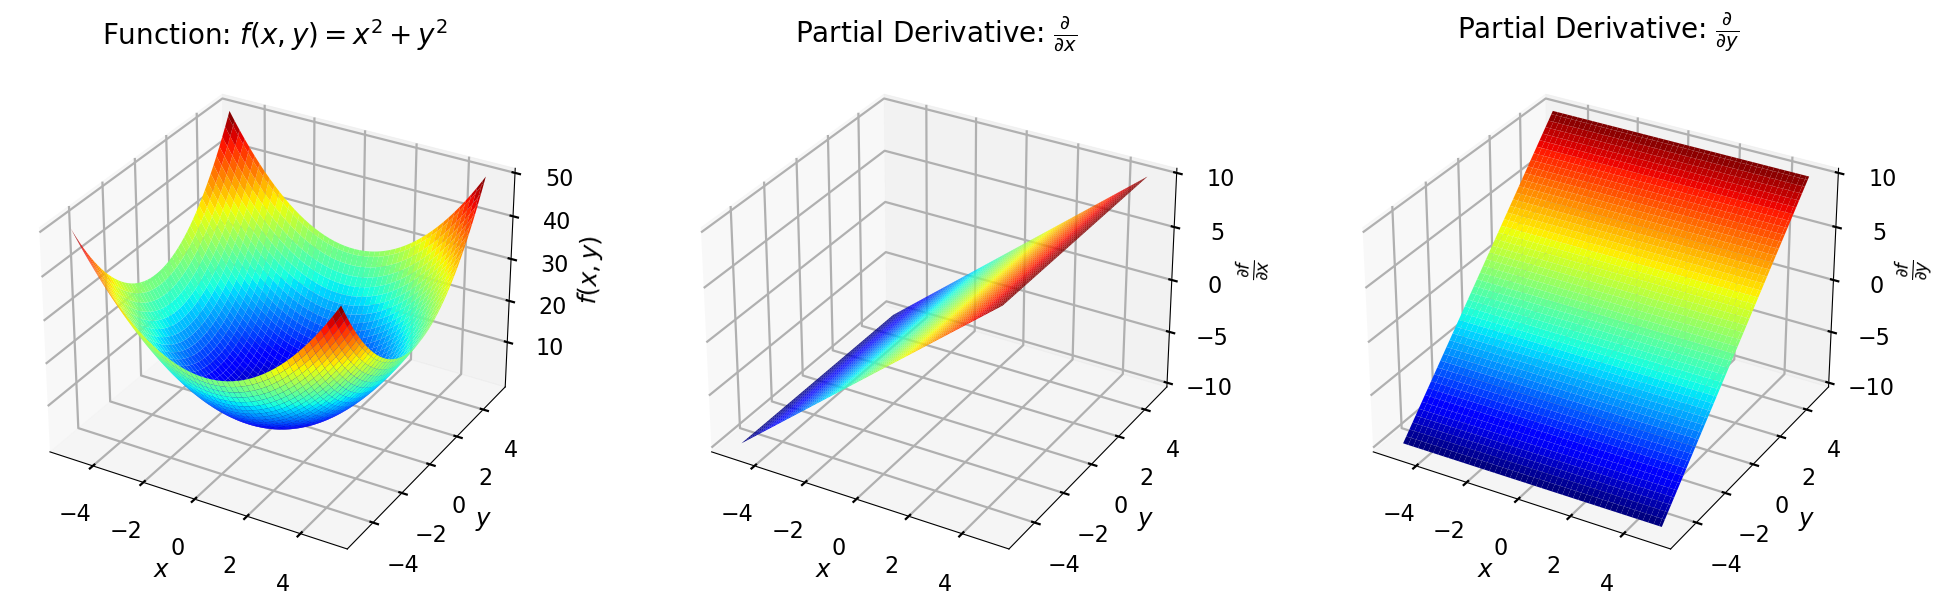

In [25]:
# 可視化のためのデータ生成
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = X**2 + Y**2
Zx = 2*X
Zy = 2*Y

fig = plt.figure(figsize=(20, 6))

# 関数の可視化
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='jet')
ax1.set_title("Function: $f(x, y) = x^2 + y^2$",size=20)
ax1.set_xlabel('$x$', labelpad=15)
ax1.set_ylabel('$y$', labelpad=15)
ax1.set_zlabel('$f(x, y)$', labelpad=15)

# xに関する偏微分
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot_surface(X, Y, Zx, cmap='jet')
ax2.set_title(r"Partial Derivative: $\frac{\partial}{\partial x}$",size=20)
ax2.set_xlabel('$x$', labelpad=15)
ax2.set_ylabel('$y$', labelpad=15)
ax2.set_zlabel(r'$\frac{\partial f}{\partial x}$', labelpad=15)

# yに関する偏微分
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(X, Y, Zy, cmap='jet')
ax3.set_title(r"Partial Derivative: $\frac{\partial}{\partial y}$",size=20)
ax3.set_xlabel('$x$', labelpad=15)
ax3.set_ylabel('$y$', labelpad=15)
ax3.set_zlabel(r'$\frac{\partial f}{\partial y}$', labelpad=15)

plt.tight_layout()
plt.show()

## 線型代数

### ベクトル

#### ベクトルとは


ベクトル(vector)とは、大きさと向きを持つ量です。ベクトルは、数が一列に並んだ集まりとして表現できます。例えば、

$$
\begin{split}{\bf x}= \begin{bmatrix}
x_{1} \\
x_{2} \\
x_{3}
\end{bmatrix}, \
{\bf y}=\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{N}
\end{bmatrix}\end{split}
$$
上の例のように、その要素を縦方向に並べたものは列ベクトルと呼びます。一方、

$$
{\bf z}=\begin{bmatrix}
z_{1} & z_{2} & z_{3}
\end{bmatrix}
$$

のように、要素を横方向に並べたものは行ベクトルと呼びます。

一般的には、ベクトルを数式で書く際には, $\mathbf{W}$のように太字の記号で表現するか、$\vec{W}$のようにベクトルの上に矢印を付けてベクトルを示すことが多いです。

#### ベクトルの数学演算

- 加算（足し算）及び減算（引き算）は同じサイズのベクトル同士の間だけで成立します。

$$
\begin{split}\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}+\begin{bmatrix}
4 \\
5 \\
6
\end{bmatrix}=\begin{bmatrix}
1 + 4 \\
2 + 5 \\
3 + 6
\end{bmatrix}=\begin{bmatrix}
5 \\
7 \\
9
\end{bmatrix}\end{split}
$$

- スカラ倍とはベクトルにスカラを掛ける演算です。

$$
\begin{split}
10
\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}=\begin{bmatrix}
10 * 1 \\
10 * 2 \\
10 * 3
\end{bmatrix}=\begin{bmatrix}
10 \\
20 \\
30
\end{bmatrix}\end{split}
$$


- 内積 (inner product) とは、同じサイズの2つのベクトルは、それぞれのベクトルの同じ位置に対応する要素同士を掛け、それらを足し合わせる計算です。$𝐱$と$𝐲$の内積は$𝐱\cdot𝐲$で表されます。

$$
\begin{split}\begin{aligned}& \begin{bmatrix}
1 & 2 & 3
\end{bmatrix} \cdot \begin{bmatrix}
4 \\
5 \\
6
 \end{bmatrix} = 1 \times 4 + 2 \times 5  + 3 \times 6 = 32 \end{aligned}\end{split}

$$

### 行列

#### 行列とは

行列 (matrix) は同じサイズのベクトルを複数個並べたものです。行列 (matrix) は同じサイズのベクトルを複数個並べたものです。例えば、

$$
\begin{split}
{\bf X} =
\begin{bmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22} \\
x_{31} & x_{32}
\end{bmatrix}
\end{split}
$$

$\mathbf{X}$は「 3 行 2 列の行列」になります。

#### 行列積

行列の乗算には、行列積、外積、要素積（アダマール積）など複数の方法があります。 ここではそのうち、機械学習の多くの問題で登場します行列積について説明します。

行列$\mathbf{A}$と行列$\mathbf{B}$の行列積は$\mathbf{AB}$と書き 、$\mathbf{A}$の各行と$\mathbf{B}$の各列の内積を並べたものとして定義されます。

例えば、行列$\mathbf{A}$の$1$行目の行ベクトルと、行列$\mathbf{B}$の$1$列目の列ベクトルの内積の結果は、$\mathbf{A}$と$\mathbf{B}$の行列積の結果を表す行列$\mathbf{C}$の$1$行$1$列目に対応します。

![](./Figure/matrix.png)

内積が定義される条件はベクトルのサイズが等しいということでしたが、ここでもそれが成り立つために、$\mathbf{A}$の行のサイズと $\mathbf{B}$ の列のサイズが一致する必要があります。

![](./Figure/matrix2.png)

#### 転置
転置（transpose）とは、$m$ 行 $n$ 列の行列 $\mathbf{A}$ に対して、 $\mathbf{A}$ の $(i, j)$ 要素と $(j, i)$ 要素を入れ替えて、$n$ 行 $m$ 列の行列に変換する操作です。転置は行列の右肩に$T$と書くことで表します。

$$
\begin{split}
{\bf A} =\begin{bmatrix}
1 & 4 \\
2 & 5 \\
3 & 6
\end{bmatrix}, \
{\bf A}^{\rm T}=\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\end{split}
$$

転置について、以下の定理を覚えておきましょう。

$$
\begin{split}\begin{aligned}
&\left( 1\right) \ \left( {\bf A}^{\rm T} \right)^{\rm T} = {\bf A} \\
&\left( 2\right) \ \left( {\bf A}{\bf B} \right)^{\rm T} = {\bf B}^{\rm T}{\bf A}^{\rm T}\\
&\left( 3\right) \ \left( {\bf A}{\bf B}{\bf C} \right)^{\rm T} = {\bf C}^{\rm T}{\bf B}^{\rm T}{\bf A}^{\rm T}
\end{aligned}\end{split}
$$

```{note}
もちろん、転置はベクトルに対しても定義できます。転置を用いると、 2 つの列ベクトル$𝐱$,$𝐲$の内積$𝐱\cdot𝐲$は、行列積を用いて$x^T 𝐲$と書けます。
```

#### ベクトルによる微分と勾配

線形結合とは、スカラー倍したベクトル同士を足し合わせることです。 

例えば、

$$
\begin{split}\begin{aligned}
{\bf b}
&=\begin{bmatrix}
3 \\
4
\end{bmatrix}, \
{\bf x} =
\begin{bmatrix}
x_{1} \\
x_{2}
\end{bmatrix}\\
{\bf b}^{\rm T}{\bf x} &=
\begin{bmatrix}
3 & 4
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
= 3x_1 + 4x_2
\end{aligned}\end{split}
$$

のように$\mathbf{x}$の要素である$x_1$および$x_2$に関して一次式となっています。

$\mathbf{𝐛^T𝐱}$をベクトル$\mathbf{x}$で微分したものを、

$$
\frac{\partial}{\partial {\bf x}} \left( {\bf b}^{\rm T}{\bf x} \right)
$$

と表します。

「ベクトルで微分」とは、ベクトルのそれぞれの要素で対象を微分し、その結果を要素に対応する位置に並べてベクトルを作ることです。つまり、

$$
\begin{split}
\begin{aligned}
\frac{\partial}{\partial {\bf x}} \left( {\bf b}^{\rm T} {\bf x} \right)
&= \frac{\partial}{\partial {\bf x}} \left( 3x_1 + 4x_2 \right) \\
&=
\begin{bmatrix}
\frac{\partial}{\partial x_1} \left( 3x_1 + 4x_2 \right) & \frac{\partial}{\partial x_2} \left( 3x_1 + 4x_2 \right)
\end{bmatrix}
\end{aligned}
\end{split}
=
\begin{bmatrix}
3 & 4
\end{bmatrix}
$$

入力ベクトルの要素毎に出力に対する偏微分を計算し、それらを並べてベクトルにしたものが **<u>勾配 (gradient)**</u> と言います。

つまり、多変数関数における傾きのようなもので、$1$変数関数のようにスカラーではなく、勾配で最も急な変化の方向とその大きさを示しています。勾配ベクトルは以下のように定義されます：


$$
\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, ... \right) \
$$

ここで、関数$f(x,y)=x^2+y^2$の値等高線とその勾配を同時にプロットします。赤い矢印が勾配ベクトルを示しており、各点で関数の最も急な上昇方向を指し示しています。

```{margin}
勾配は、関数の局所的な形状や変化の方向を理解する上で非常に役立ちます。特に機械学習や最適化の分野では、勾配降下法というアルゴリズムが関数の最小値を求めるために使用され、この勾配の概念が中心的な役割を果たしています。
```

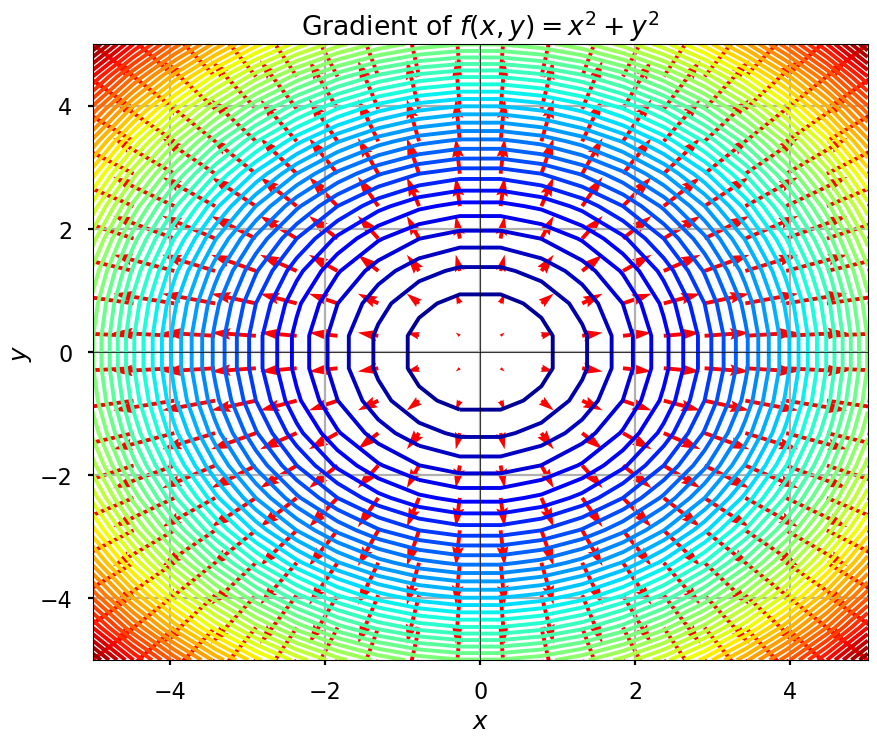

In [26]:

# 関数とその勾配
def function(x, y):
    return x**2 + y**2

def gradient(x, y):
    dfdx = 2*x
    dfdy = 2*y
    return dfdx, dfdy

# 座標の生成
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
Z = function(X, Y)
U, V = gradient(X, Y)

# 可視化
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=50, cmap='jet')  # 値を等高線で表示
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=10, color='red', width=0.005)  # 勾配ベクトルを矢印で表示
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Gradient of $f(x, y) = x^2 + y^2$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()